In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [45]:
data_path = "dumps/2020-May-24-22:29:25/valid_E9.json"
os.path.isfile(data_path)

True

In [46]:
df = pd.read_json(data_path)

In [47]:
print("Latent space dim:", len(df.iloc[0].z))

Latent space dim: 16


In [48]:
# Fetching latent space
x = [np.array(z) for z in df["z"].values]

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [49]:
# Creating PCA and finding component
n_components = 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf["dataset"] = df["dataset"]

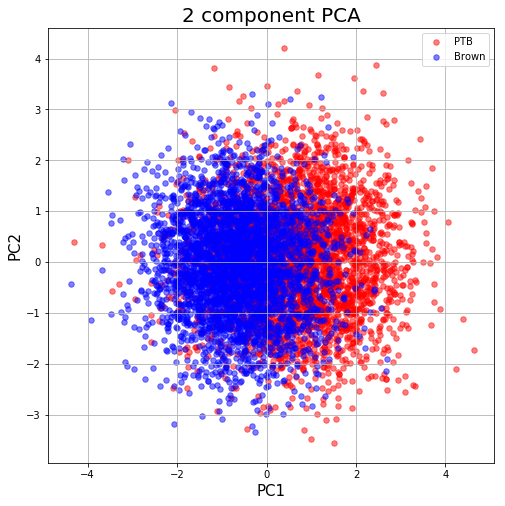

In [50]:
# Plot for 2D PCA
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

datasets = [0, 1]

colors = ['r', 'b']

for color, dataset in zip(colors, datasets):
    data = principalDf[principalDf["dataset"] == dataset]
    ax.scatter(data['PC1'], data['PC2'], c = color, s = 30, alpha=0.5)

ax.legend(["PTB", "Brown"])
ax.grid()

In [51]:
print("Explained variance:", sum(pca.explained_variance_ratio_))

Explained variance: 0.1720237491426177


,PC1,PC2,dataset
0,1.162136,0.433393,0
1,1.303564,-0.607056,0
2,1.532829,1.378962,0
3,0.221480,1.843742,0
4,-1.218700,-0.976431,0
...,...,...,...
635,1.242396,-0.610693,1
636,1.053944,1.054761,1
637,-0.335412,0.136318,1
638,0.290902,0.505761,1
